$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de Shor</h1>

In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import numpy as np

C:\Users\diego\AppData\Local\Temp\ipykernel_28652\2279110037.py:17: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft = QFT(2)


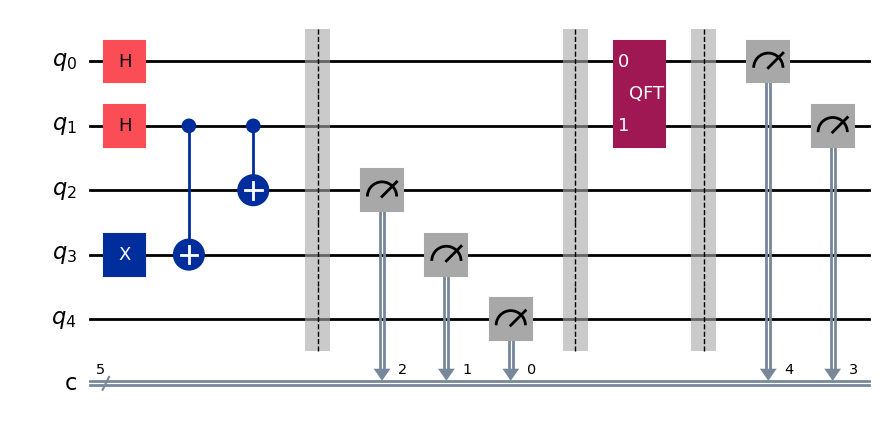

In [2]:
# Oraculo para operaciones modulares
# definir el circuito
qc = QuantumCircuit(5, 5)

# Oraculo
qc.h(range(2))
qc.x(3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.barrier()

# Medimos todos los qubits pero invirtiendo el orden
qc.measure(range(2, 5), range(2, -1, -1))
qc.barrier()

# QFT
qft = QFT(2)
qc.append(qft, range(2))
qc.barrier()

qc.measure(range(2), range(4, 2, -1))

# dibujar el circuito
qc.draw('mpl')

Statevector([ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.707+0.707j, -0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
              0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
            dims=(2, 2, 2, 2, 2))


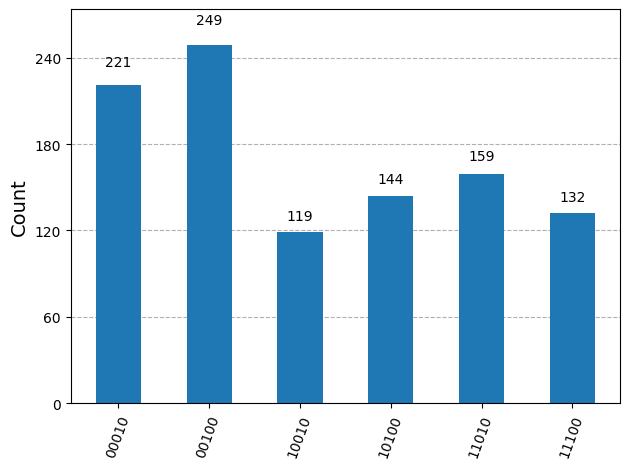

In [3]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1024)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Plot the results as a histogram
plot_histogram(counts)